# 15. 인터넷에서 금융 데이터 가져오기

## 15.1 이 장의 계획

## 15.2 pandas 패키지 소개

- pip install pandas
- pip install pandas_datareader

- pandas 패키지
  - 기초적인 테이블이나 대량 정보를 저장하는 데 사용하는 데이터베이스와 유사한 데이터 프레임(data frame) 객체 생성
  - 인터넷을 통하여 정보를 내려받을 수 있는 기능 제공

## 15.3 stock_load : 간단한 데이터 리더

- 야후 파이낸스를 통하여 마이크로소프트 주식 정보 가져오기
  - https://finance.yahoo.com/
- DataReader() 
  - 기본 5년치 데이터

In [1]:
'''File stock_load.py -----------------------------

티커(ticker) 기호를 가져오기 위해서 주식 데이터 적재 작업을 수행한다.
의존하고 있는 모듈은 없다.

'''
# pip install pandas_datareader
import pandas_datareader.data as web

def load_stock(ticker_str):
    ''' 주식 적재 함수.
    인수로 주어진 문자열 ticker_str의 정보를 적재한다.
    'MSFT'와 같이 정해진 주식의 정보를 판다스 데이터 프레임에 넣고 반환한다.
    '''
    df = web.DataReader(ticker_str, 'yahoo')
    df = df.reset_index()
    return df

# 데이터 프레임(stock_df)을 가져와서 출력한다.
if __name__ == '__main__':
    stock_df = load_stock('MSFT') 	# 'msft'도 괜찮다. 마이크로소프트 주식 정보
    print(stock_df)
    print(stock_df.columns)

           Date        High         Low        Open       Close      Volume  \
0    2016-08-15   58.500000   57.959999   58.009998   58.119999  19283900.0   
1    2016-08-16   57.619999   57.270000   57.610001   57.439999  20523500.0   
2    2016-08-17   57.680000   57.230000   57.540001   57.560001  18856400.0   
3    2016-08-18   57.700001   57.270000   57.419998   57.599998  14214300.0   
4    2016-08-19   57.730000   57.200001   57.430000   57.619999  17271000.0   
...         ...         ...         ...         ...         ...         ...   
1254 2021-08-09  291.549988  287.809998  289.750000  288.329987  16117600.0   
1255 2021-08-10  289.250000  285.200012  288.799988  286.440002  18616600.0   
1256 2021-08-11  288.660004  285.859985  287.209991  286.950012  13955900.0   
1257 2021-08-12  289.970001  286.339996  286.630005  289.809998  14561300.0   
1258 2021-08-13  292.899994  289.299988  289.480011  292.850006  18231400.0   

       Adj Close  
0      53.543526  
1      53.246

- 대한민국 GS 주식 정보 가져오기
  - https://wikidocs.net/4370

In [2]:
if __name__ == '__main__':
    stock_df = load_stock('078930.KS')
    print(stock_df)
    print(stock_df.columns)

           Date     High      Low     Open    Close    Volume     Adj Close
0    2016-08-16  50300.0  49350.0  50300.0  49450.0  211693.0  41125.605469
1    2016-08-17  50400.0  49550.0  49700.0  50100.0  212272.0  41666.179688
2    2016-08-18  50700.0  49900.0  50300.0  50100.0  173079.0  41666.179688
3    2016-08-19  51100.0  50200.0  50600.0  50900.0  221252.0  42331.511719
4    2016-08-22  51300.0  50000.0  50600.0  50500.0  193981.0  41998.843750
...         ...      ...      ...      ...      ...       ...           ...
1218 2021-08-09  43100.0  42600.0  42850.0  42700.0  156286.0  42700.000000
1219 2021-08-10  43250.0  42300.0  43100.0  42400.0  212447.0  42400.000000
1220 2021-08-11  42850.0  42000.0  42450.0  42250.0  312576.0  42250.000000
1221 2021-08-12  43100.0  42000.0  42600.0  42000.0  281895.0  42000.000000
1222 2021-08-13  42600.0  41450.0  42300.0  41850.0  251031.0  41850.000000

[1223 rows x 7 columns]
Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj C

## 15.4 간단한 주식 차트 만들기

In [3]:
'''File stock_plot_v1.py ---------------------------

두 개의 지정 주식에 대한 종장 시세로 최소 그래프를 그린다.
file stock_load.py에 의존성이 있다.
'''
import numpy as np
import matplotlib.pyplot as plt
from stock_load import load_stock

def do_plot(stock_df):
    ''' 플롯을 수행하는 함수.
    stock_df를 사용하여, 웹에서 주식 데이터 프레임을 읽어 온다.
    '''
    column = stock_df.Close 			# 가격 추출.
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column) 		# 플롯 수행.
    plt.show() # Show the plot.

# 두 개의 테스트 케이스 수행.
if __name__ == '__main__':
    stock_df = load_stock('MSFT')
    do_plot(stock_df)
    
    stock_df = load_stock('AAPL')
    do_plot(stock_df)

/Users/yhhan/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## 15.5 제목과 범례 추가하기

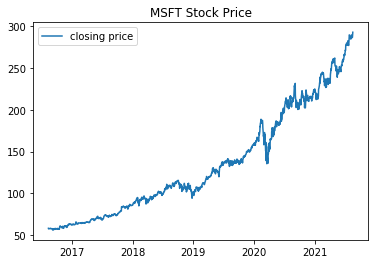

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from stock_load import load_stock

def do_plot(stock_df):
    ''' 플롯을 수행하는 함수.
    stock_df를 사용하여, 웹에서 주식 데이터 프레임을 읽어 온다. 
    '''
    column = stock_df.Close 			# 시세 출력.
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column, label = 'closing price')
    plt.legend()
    plt.title('MSFT Stock Price')
    plt.show() 					# 그래프 출력.

if __name__ == '__main__':
    stock_df = load_stock('MSFT')
    do_plot(stock_df)

## 15.6 makeplot 함수 작성하기 (리팩토링)

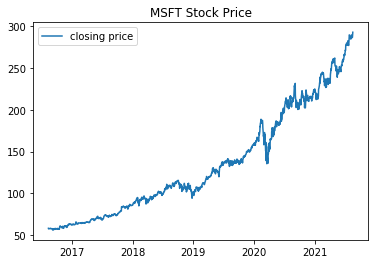

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from stock_load import load_stock

def makeplot(stock_df, field, my_str):
    column = getattr(stock_df, field)
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column, label=my_str)
    plt.legend()

def do_plot(stock_df, name_str):
    makeplot(stock_df, 'Close', 'closing price')
    plt.title(name_str + ' Stock Price')
    plt.show()

if __name__ == '__main__':
    stock_df = load_stock('MSFT')
    do_plot(stock_df, 'MSFT')

## 15.7 두 개의 주식 시세를 함께 그래프로 그리기

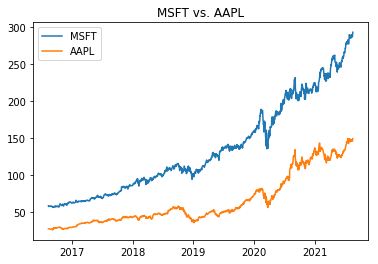

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from stock_load import load_stock

def makeplot(stock_df, field, my_str):
    column = getattr(stock_df, field)
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column, label=my_str)
    plt.legend()
    
def do_duo_plot(stock1_df, stock2_df):
    '''개정된 do plot 함수.
    이번에는 2개의 주식 데이터 프레임을 처리한다.
    모두 함께 그래프로 표현한다.
    '''
    makeplot(stock1_df, 'Close', 'MSFT')
    makeplot(stock2_df, 'Close', 'AAPL')
    plt.title('MSFT vs. AAPL')
    plt.show()

# 메인 모듈이면, 테스트를 수행한다.
if __name__ == '__main__':
    stock1_df = load_stock('MSFT')
    stock2_df = load_stock('AAPL')
    do_duo_plot(stock1_df, stock2_df)

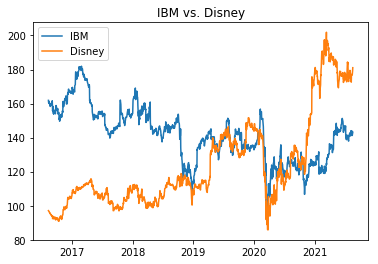

In [ ]:
'''File stock_plot_v2.py
---------------------------------
두 개의 주식 시세를 그래프를 그린다.
stock_load.py에 의존성이 있다.
'''
import numpy as np
import matplotlib.pyplot as plt
from stock_load import load_stock

# 플롯을 만든다: 지루하고 반복적인 작업을 수행한다.
def makeplot(stock_df, field, my_str):
    column = getattr(stock_df, field)
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column, label=my_str)
    plt.legend()
    
def do_duo_plot(stock1_df, stock2_df, name1, name2):
    ''' 두 주식의 그래프를 그린다.
    인수는 데이터 프레임과,
    열의 이름으로 사용할 주식 시세 기호 문자열이다.
    '''
    makeplot(stock1_df, 'Close', name1)
    makeplot(stock2_df, 'Close', name2)
    plt.title(name1 + ' vs. ' + name2)
    plt.show()

# 메인 모듈이면 테스트를 수행한다.
if __name__ == '__main__':
    stock1_df = load_stock('IBM')
    stock2_df = load_stock('DIS')
    do_duo_plot(stock1_df, stock2_df, 'IBM', 'Disney')

## 15.8 응용: 다른 데이터 그래프 그리기

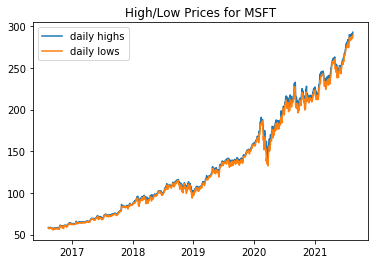

In [ ]:
'''File stock_plot_v3.py
---------------------------------
주식의 일일 최고가와 최저가를 그래프로 표현한다.
stock_load.py에 의존성이 있다.
'''
import numpy as np
import matplotlib.pyplot as plt
from stock_load import load_stock

# 플롯을 만든다: 지루하고 반복적인 작업을 수행한다.
def makeplot(stock_df, field, my_str):
    column = getattr(stock_df, field)
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column, label=my_str)
    plt.legend()

def do_highlow_plot(stock_df, name_str):
    ''' 일일 최고가와 최저가의 점을 구한다.
    인수로 전달받은 주식 데이터 프레임(stock_df)의 
    1개의 주식을 위한 최고가와 최저가 열을 사용한다.
    '''
    makeplot(stock_df, 'High', 'daily highs')
    makeplot(stock_df, 'Low', 'daily lows')
    plt.title('High/Low Prices for ' + name_str)
    plt.show()

# 메인 모듈인 경우 테스트를 수행한다.
if __name__ == '__main__':
    stock_df = load_stock('MSFT')
    do_highlow_plot(stock_df, 'MSFT')

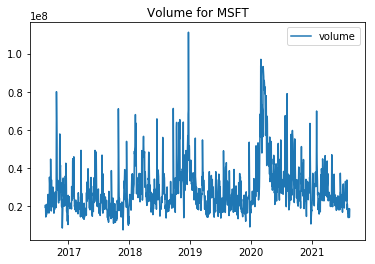

In [ ]:
def do_volume_plot(stock_df, name_str):
    ''' 전달 받은 데이터 프레임(stock_df)의 
    일일 주식 판매량을 그래프로 표현한다.data frame (stock_df).
    '''
    makeplot(stock_df, 'Volume', 'volume')
    plt.title('Volume for ' + name_str)
    plt.show()

stock_df = load_stock('MSFT')
do_volume_plot(stock_df, 'MSFT')

## 15.9 기간 제한하기

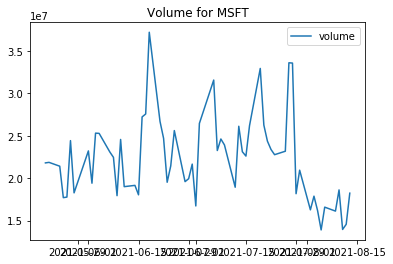

In [ ]:
def do_volume_plot(stock_df, name_str):
    ''' 전달 받은 주식의 일일 판매량인 데이터 프레임(stock_df)을 그래프로 그린다.
    최근 60일치 데이터를 그래프로 표현한다.
    '''
    stock_df = stock_df[-60:].reset_index()
    makeplot(stock_df, 'Volume', 'volume')
    plt.title('Volume for ' + name_str)
    plt.show()
    
stock_df = load_stock('MSFT')
do_volume_plot(stock_df, 'MSFT')

## 15.10 차트 쪼개기: 판매량의 서브플롯

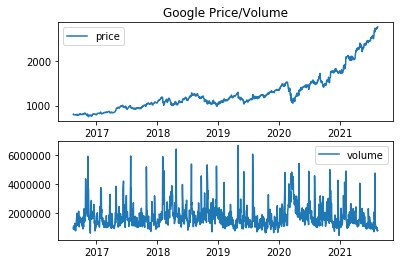

In [ ]:
def do_split_plot(stock_df, name_str):
    ''' 서브플롯이 있는 그래프를 그린다.
    U웹에서 읽어 온 주식 데이터 프레임 stock_df를 사용한다.
    '''
    plt.subplot(2, 1, 1) # Plot top half.
    makeplot(stock_df, 'Close', 'price')
    
    plt.title(name_str + ' Price/Volume') # 상단 그래프에만 제목 생성

    plt.subplot(2, 1, 2) # Plot bottom half.
    makeplot(stock_df, 'Volume', 'volume')
    plt.show()
    
stock_df = load_stock('GOOGL')
do_split_plot(stock_df, 'Google')

## 15.11	변동 평균 (Moving Average) 선 추가하기

- 선택된 열의 변동 평균 데이터 = 선택된 열.rolling(n, min_periodes=m).mean()
  - n: 평균 산출에 사용할 과거 날짜 수
  - min_periods: 변동 평균을 구하기 위해 필요한 이전 데이터 지점 수

In [ ]:
# 그래프를 그린다 : 지루하고 반복적인 작업을 수행한다. stuff.
def makeplot(stock_df, field, my_str, avg=0):
    column = getattr(stock_df, field)

    if avg: # Only work if avg is not 0!
        column = column.rolling(avg, min_periods=1).mean()

    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column, label=my_str)
    plt.legend()

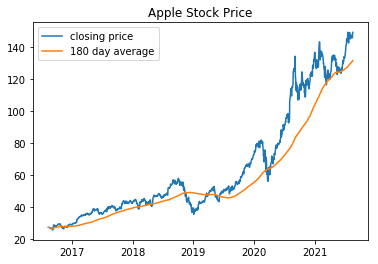

In [ ]:
def do_movingavg_plot(stock_df, name_str):
    ''' 동적-평균 플롯 함수 수행하기.
    180일 동적 평균 선과 함께 가격을 그래프로 그린다.
    '''
    makeplot(stock_df,'Close', 'closing price')
    makeplot(stock_df,'Close', '180 day average', 180)
    plt.title(name_str + ' Stock Price')
    plt.show()
    
stock_df = load_stock('AAPL')
do_movingavg_plot(stock_df, 'Apple')

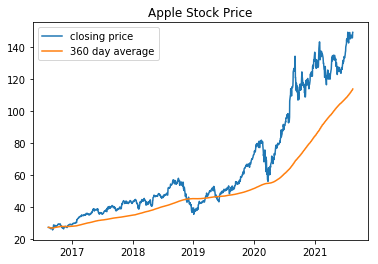

In [ ]:
def do_movingavg_plot(stock_df, name_str):
    ''' 동적-평균 플롯 함수 수행하기.
    180일 동적 평균 선과 함께 가격을 그래프로 그린다.
    '''
    makeplot(stock_df,'Close', 'closing price')
    makeplot(stock_df,'Close', '360 day average', 360)
    plt.title(name_str + ' Stock Price')
    plt.show()
    
stock_df = load_stock('AAPL')
do_movingavg_plot(stock_df, 'Apple')

## 15.12 사용자에게 선택권 넘기기

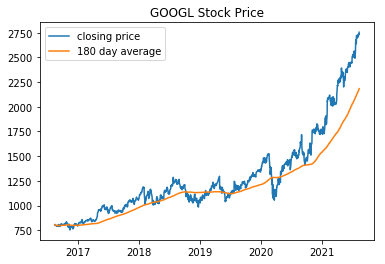

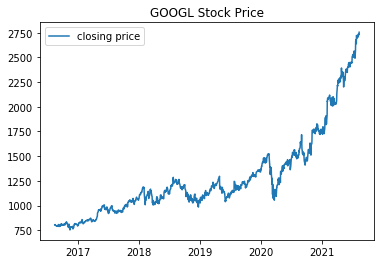

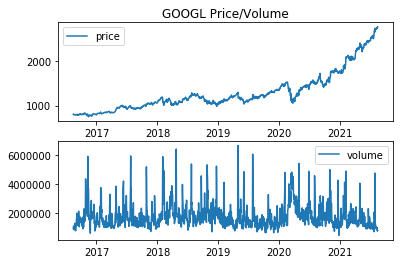

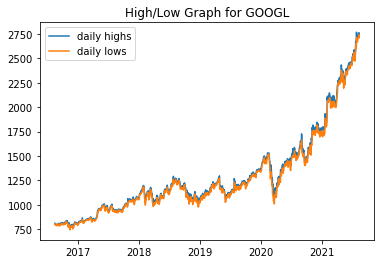

In [ ]:
# file stock_plot_v4.py ------------------------------

import numpy as np
import matplotlib.pyplot as plt
from stock_load import load_stock

def do_simple_plot(stock_df, name_str):
    ''' 플롯을 수행하는 함수.
    간단한 종가 그래프를 그린다.
    '''
    makeplot(stock_df,'Close', 'closing price')
    plt.title(name_str + ' Stock Price')
    plt.show()

def do_highlow_plot(stock_df, name_str):
    ''' 최고가/최저가 플롯을 수행하는 함수.
    주식의 최고가와 최저가를 그래프로 그리고, 보여준다.
    '''
    makeplot(stock_df, 'High', 'daily highs')
    makeplot(stock_df, 'Low', 'daily lows')
    plt.title('High/Low Graph for ' + name_str)
    plt.show()

def do_volume_subplot(stock_df, name_str):
    ''' 판매량 서브플롯을 수행하는 함수.
    종가와 판매량 서브플롯을 그래프로 그린다.
    '''
    plt.subplot(2, 1, 1) 			# 위쪽 그래프를 그린다.
    makeplot(stock_df, 'Close', 'price')
    plt.title(name_str + ' Price/Volume')
    plt.subplot(2, 1, 2) 			# 아래쪽 그래프를 그린다.
    makeplot(stock_df, 'Volume', 'volume')
    plt.show()

def do_movingavg_plot(stock_df, name_str):
    ''' 변동-평균 플롯을 수행하는 함수.
    180간의 변동 평균 선을 가격과 함께 그래프로 그린다.
    '''
    makeplot(stock_df,'Close', 'closing price')
    makeplot(stock_df,'Close', '180 day average', 180)
    plt.title(name_str + ' Stock Price')
    plt.show()

# 지루하고 반복되는 작업을 수행한다.
def makeplot(stock_df, field, my_str, avg=0):
    column = getattr(stock_df, field)
    if avg: # Only plot avg if not 0!
        column = column.rolling(avg, min_periods=1).mean()
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column, label=my_str)
    plt.legend()

if __name__ == '__main__':
    name_str = 'GOOGL'
    stock_df = load_stock(name_str)
    do_movingavg_plot(stock_df, name_str)
    do_simple_plot(stock_df, name_str)
    do_volume_subplot(stock_df, name_str)
    do_highlow_plot(stock_df, name_str)

In [ ]:
# file stock_demo.py ------------------------------

from stock_plot_v4 import *

menu_str = ('메뉴 선택:\n' +
'0. 종료\n' +
'1. 간단한 종가 그래프 출력\n' +
'2. 일일 최고가와 최저가 출력 \n' +
'3. 가격/판매량 서브플롯 출력 \n' +
'4. 변동 평균을 추가한 가격 \n')

prompt_msg = '주식 시세 기호를 입력하세요 (종료하려면 엔터를 입력하세요): '
def main():
    while True:
        # 유요한 주식을 사용자에게 입력 받을 때까지 프롬포트를 띄운다.
        try:
            s = input(prompt_msg)
            s = s.strip()
            if not s: 				# 빈 문자열이면 루프를 탈출한다.
                return
            stock_df = load_stock(s)
            n = int(input(menu_str + '선택한 메뉴를 입력하세요: '))

            if n < 0 or n > 4:
                n = 0
            if n == 0:
                return

            fn = [do_simple_plot, do_highlow_plot, do_volume_subplot, do_movingavg_plot][n-1]
            fn(stock_df, s)
        except:
            print('주식을 찾지 못했습니다. 다시 시도하세요. ')

main()